In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("dataset_vs/advertising.csv")
print(data.shape)
data.head(10)

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

# Data Analysis

In [5]:
data_cp=data.copy()

### Data Visualisation

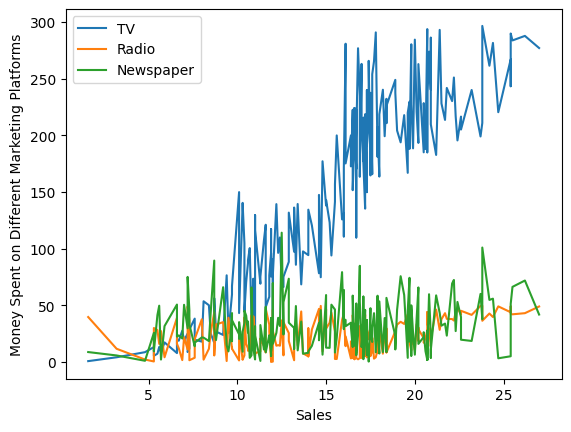

In [6]:
import  matplotlib.pyplot as plt
data_sales=data_cp.sort_values("Sales")
plt.plot(data_sales["Sales"],data_sales["TV"],label="TV")
plt.plot(data_sales["Sales"],data_sales["Radio"],label="Radio")
plt.plot(data_sales["Sales"],data_sales["Newspaper"],label="Newspaper")
plt.xlabel("Sales")
plt.ylabel("Money Spent on Different Marketing Platforms")
plt.legend()
plt.show()

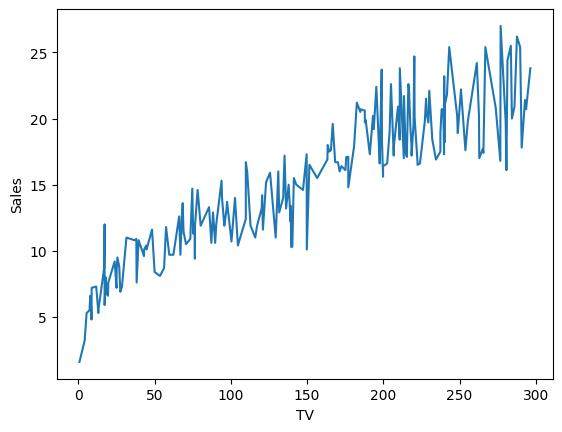

In [7]:
data_TV=data_cp.sort_values("TV")
plt.plot(data_TV["TV"],data_TV["Sales"])
plt.ylabel("Sales")
plt.xlabel("TV")
plt.show()

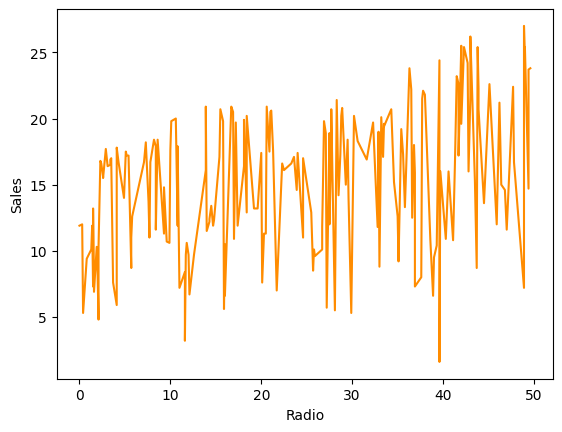

In [8]:
data_Radio=data_cp.sort_values("Radio")
plt.plot(data_Radio["Radio"],data_Radio["Sales"],color="darkorange")
plt.ylabel("Sales")
plt.xlabel("Radio")
plt.show()

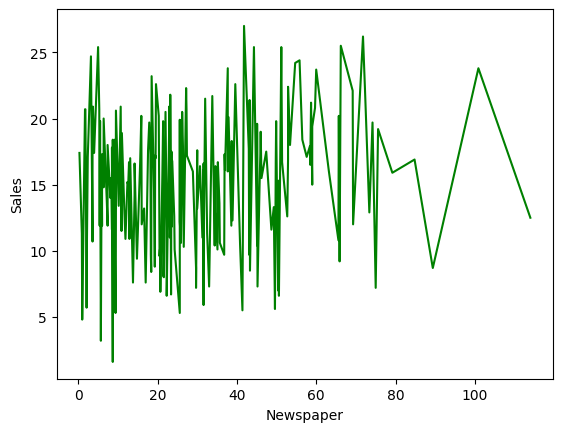

In [9]:
data_NP=data_cp.sort_values("Newspaper")
plt.plot(data_NP["Newspaper"],data_NP["Sales"],color="green")
plt.ylabel("Sales")
plt.xlabel("Newspaper")
plt.show()

In [10]:
plt.show()

#### Coorelations

In [11]:
corr_matrix=data_cp.corr()
corr_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


### NUll values

In [12]:
corr_matrix["Sales"]

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

In [13]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Data Spliting 

In [14]:
X=data.iloc[:,:3]
y=data["Sales"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,shuffle=True)

# Model Trainig

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [17]:
model_lr=LinearRegression()
model_SVR=SVR()
model_RFR=RandomForestRegressor(random_state=42,n_estimators=100)
model_XGR=XGBRegressor()


In [18]:
m1=model_lr.fit(X_train,y_train)
m2=model_SVR.fit(X_train,y_train)
m3=model_RFR.fit(X_train,y_train)
m4=model_XGR.fit(X_train,y_train)


## Predictions

In [19]:
pred1=model_lr.predict(X_valid)
pred2=model_SVR.predict(X_valid)
pred3=model_RFR.predict(X_valid)
pred4=model_XGR.predict(X_valid)


In [20]:
from sklearn.metrics import mean_absolute_error
print("LinearRegression : ",mean_absolute_error(pred1,y_valid), model_lr.score(X_valid,y_valid))
print("SVR : ",mean_absolute_error(pred2,y_valid),model_SVR.score(X_valid,y_valid))
print("RandomForestRegressor : ",mean_absolute_error(pred3,y_valid),model_RFR.score(X_valid,y_valid))
print("XGBRegressor : ",mean_absolute_error(pred4,y_valid),model_XGR.score(X_valid,y_valid))


LinearRegression :  1.268690793038541 0.9143201828721231
SVR :  1.555783662356245 0.8734825861577609
RandomForestRegressor :  0.8080249999999978 0.9594576941192339
XGBRegressor :  0.9425404715538024 0.9509545293243686


In [21]:
pred3

array([16.848, 17.573, 15.359, 11.459, 17.921, 16.733, 19.398, 14.616,
       22.833,  5.967, 12.666, 18.308, 24.795,  9.668, 23.048, 19.004,
        9.689, 18.659, 12.895, 11.109, 15.633, 13.536,  7.   , 17.469,
       18.347, 25.272,  9.655,  6.64 , 19.958,  9.635, 19.88 , 11.314,
       18.459,  8.033, 13.94 , 19.094,  6.83 , 11.666,  8.353,  8.117])

## Results

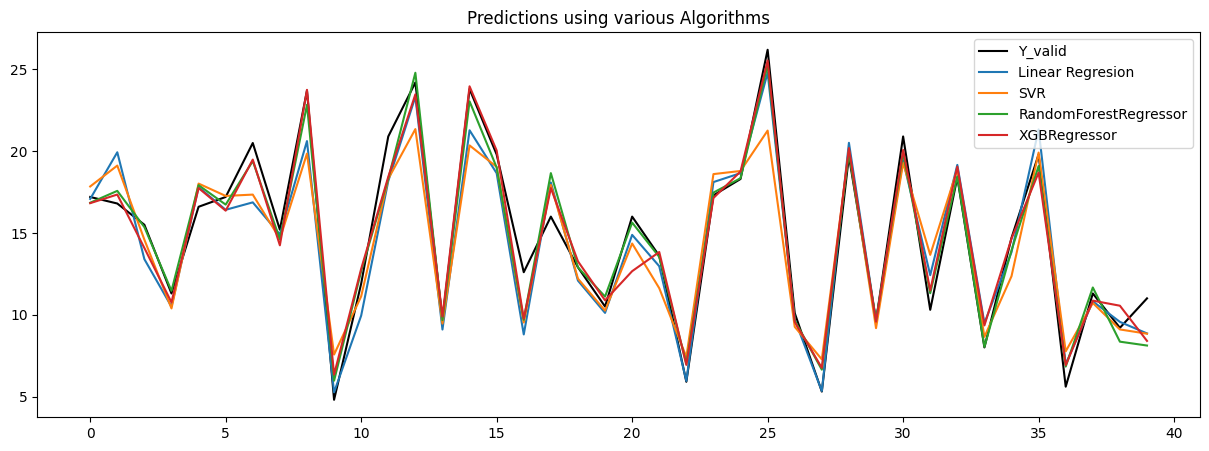

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_valid)),y_valid, label="Y_valid",color="black")
plt.plot(range(0,len(y_valid)),pred1, label="Linear Regresion")
plt.plot(range(0,len(y_valid)),pred2, label="SVR")
plt.plot(range(0,len(y_valid)),pred3, label="RandomForestRegressor")
plt.plot(range(0,len(y_valid)),pred4, label="XGBRegressor")

plt.legend(loc="upper right")
plt.title("Predictions using various Algorithms")

plt.show()

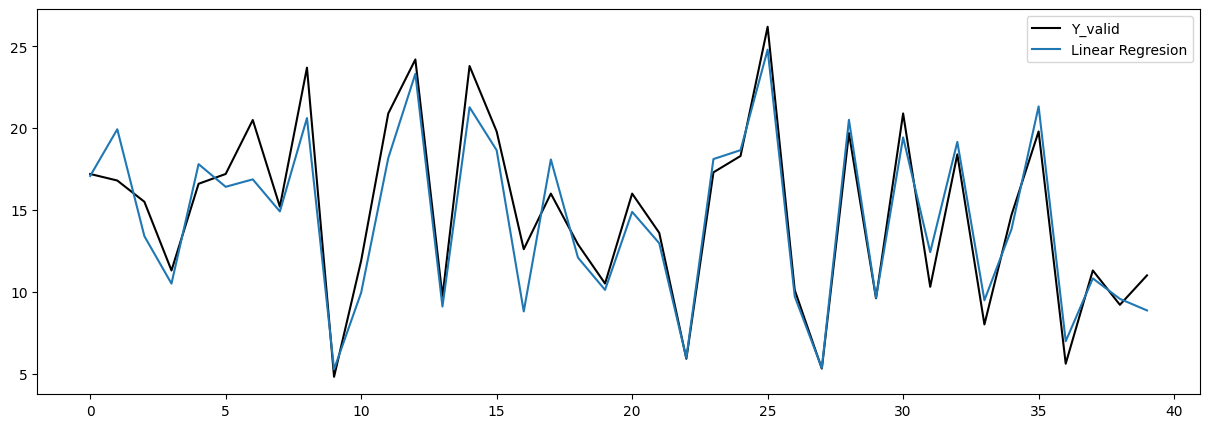

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_valid)),y_valid, label="Y_valid",color="black")
plt.plot(range(0,len(y_valid)),pred1, label="Linear Regresion")
plt.legend(loc="upper right")
plt.show()

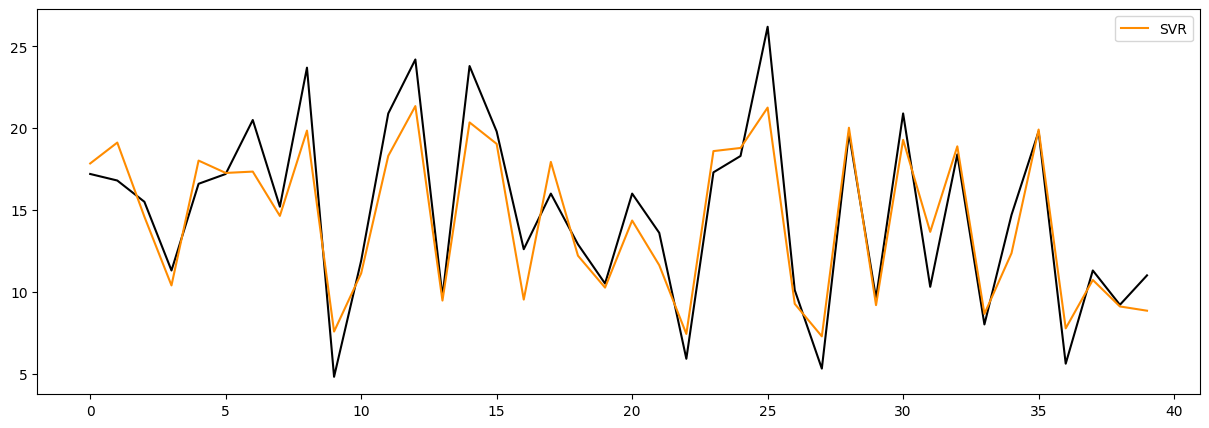

In [24]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_valid)),y_valid,color="black")
plt.plot(range(0,len(y_valid)),pred2, label="SVR",color="darkorange")
plt.legend(loc="upper right")
plt.show()

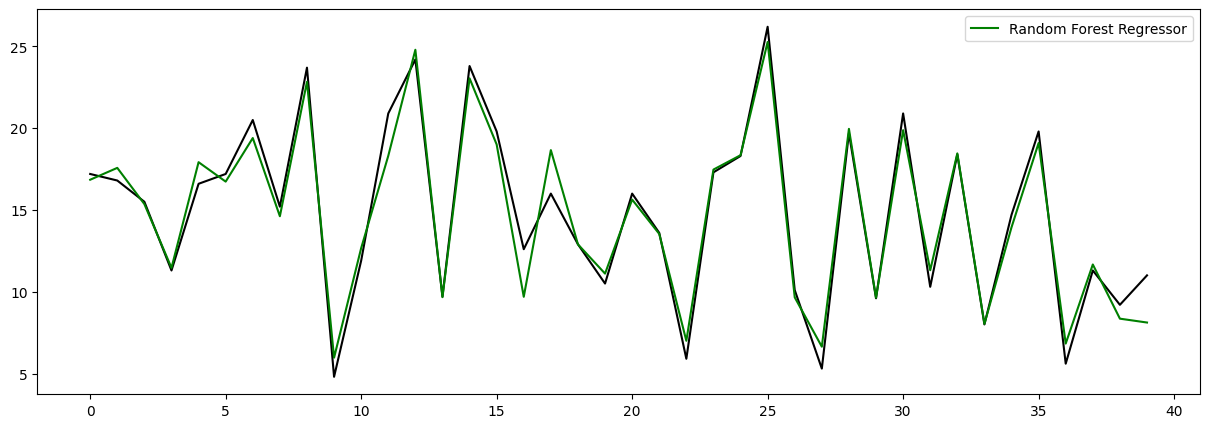

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_valid)),y_valid,color="black")
plt.plot(range(0,len(y_valid)),pred3, label="Random Forest Regressor",color="green")
plt.legend(loc="upper right")
plt.show()

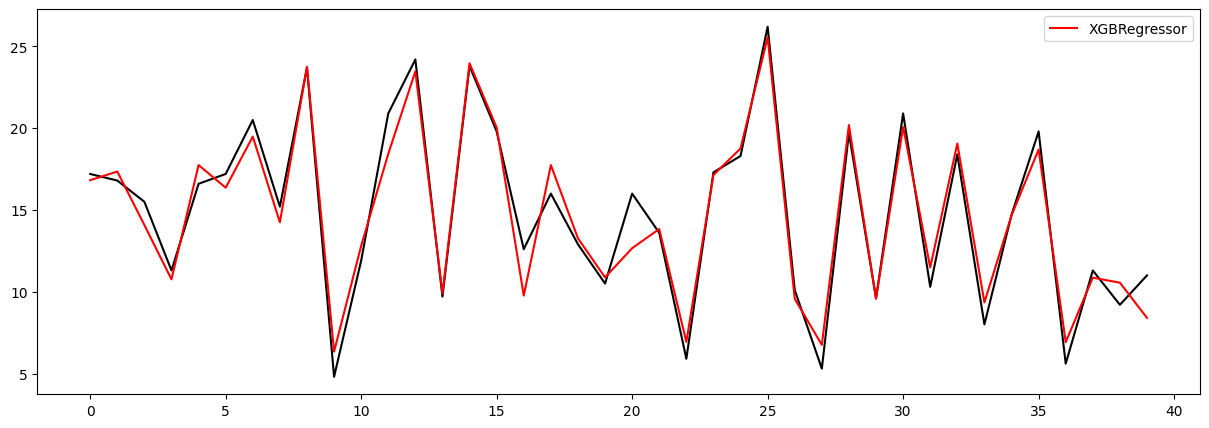

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(range(0,len(y_valid)),y_valid,color="black")
plt.plot(range(0,len(y_valid)),pred4, label="XGBRegressor",color="red")
plt.legend(loc="upper right")
plt.show()

In [27]:
import joblib
joblib.dump(model_lr,"sales_prediction_LR")
joblib.dump(model_SVR,"sales_prediction_SVR")
joblib.dump(model_RFR,"sales_prediction_RFR")
joblib.dump(model_XGR,"sales_prediction_XGBR")

['sales_prediction_XGBR']